# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Ref
https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

#How to Import Time Series in Python?
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [4]:
df_stock = pd.read_csv('data/AAPL.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-04-19,8.822500,8.853214,8.634643,8.823929,7.555702,566924400,2010-04-19
2010-04-20,8.876429,8.901786,8.677143,8.735357,7.479861,738326400,2010-04-20
2010-04-21,9.242857,9.294643,9.133214,9.257857,7.927264,982391200,2010-04-21
2010-04-22,9.222857,9.526786,9.150000,9.516786,8.148975,793424800,2010-04-22
2010-04-23,9.571071,9.720714,9.535714,9.672500,8.282313,796955600,2010-04-23


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-04-08,171.779999,171.779999,169.199997,170.089996,170.089996,76515900,2022-04-08
2022-04-11,168.710007,169.029999,165.500000,165.750000,165.750000,72246700,2022-04-11
2022-04-12,168.020004,169.869995,166.639999,167.660004,167.660004,79265200,2022-04-12
2022-04-13,167.389999,171.039993,166.770004,170.399994,170.399994,70618900,2022-04-13
2022-04-14,170.619995,171.270004,165.039993,165.289993,165.289993,75237500,2022-04-14


# Quick Plot

In [5]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='Open', 
    title='Stock price (Open)'
)

fig.show()

In [6]:
fig = px.area(
    data_frame = df_stock, 
    x='Date', 
    y='High', 
    title='Stock price (High)'
)

fig.show()

# Plotting all columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f219e6fc790>,
      dtype=object)

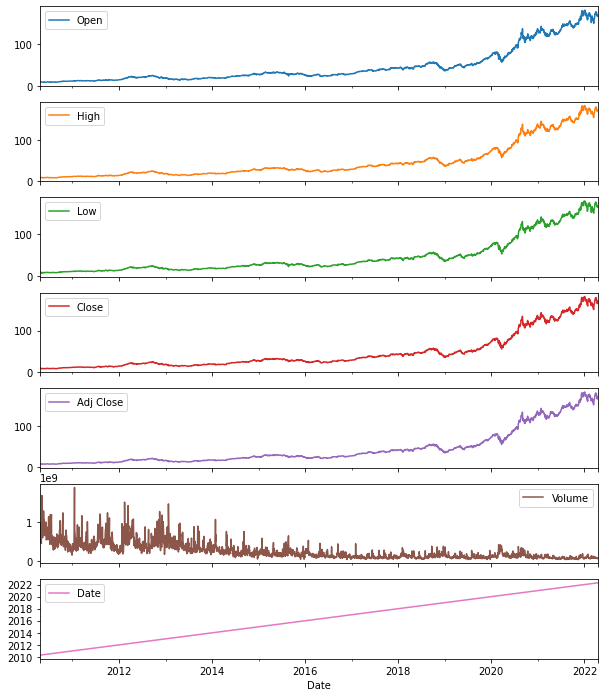

In [7]:
df.plot(subplots = True, figsize = (10, 12))

# Plotting multiple traces
Previously, plotting multiple traces was difficult. One has to use Plotly's Go library and call add_traces function. Or, they need to melt multiple columns in to one (known as long-format).

But recently, it has been easier in Plotly Express-- one needs to pass a list in 'y'.

More: # https://plotly.com/python/wide-form/

Below, these three approaches are shown one by one

## Approach 1: Easy one (use plotly express)

In [8]:
# plotting multiple 'y's (in a list)
fig = px.line(
  data_frame = df, 
  x='Date', 
  y=['Open', 'High', 'Low', 'Close', 'Adj Close'],   # note that y is a list
  title='Stock price'
)

fig.show()

## Approach 2: Okay one (use go.Figure and add_traces)

In [9]:
fig = go.Figure()

# add each trace separately. Use go.Scatter internally
fig.add_trace(go.Scatter(y = df['Open'], name="Open"))
fig.add_trace(go.Scatter(y = df['High'], name="High"))
fig.add_trace(go.Scatter(y = df['Low'], name="Low"))
fig.add_trace(go.Scatter(y = df['Close'], name="Close"))
fig.add_trace(go.Scatter(y = df['Adj Close'], name="Adj Close"))

fig.show()

## Approach 3: Hard one (use dataframe melting and plotly express)

Sometimes it is benefical to stack all columns into one and another column as label. To do that, we use pandas' melt command (below). Note that all 6 columns are not stacked into a single 'Label' column and another one named Value to show their types.

In [10]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

# remove Volume from this dataset
df_stock_temp = df_stock.drop(['Volume'], axis = 1)

df_stock_melted = pd.melt(
    df_stock_temp, id_vars=['Date'], 
    var_name = 'Label',
    value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close'],    
    value_name = 'Value'
)
df_stock_melted.set_index(['Date'], inplace=True)
df_stock_melted['Date'] = df_stock_melted.index


display(df_stock_melted.head())
display(df_stock_melted.tail())

,Label,Value,Date
Date,,,
2010-04-19,Open,8.822500,2010-04-19
2010-04-20,Open,8.876429,2010-04-20
2010-04-21,Open,9.242857,2010-04-21
2010-04-22,Open,9.222857,2010-04-22
2010-04-23,Open,9.571071,2010-04-23


,Label,Value,Date
Date,,,
2022-04-08,Adj Close,170.089996,2022-04-08
2022-04-11,Adj Close,165.750000,2022-04-11
2022-04-12,Adj Close,167.660004,2022-04-12
2022-04-13,Adj Close,170.399994,2022-04-13
2022-04-14,Adj Close,165.289993,2022-04-14


In [35]:
# show all lines together
fig = px.line(
    data_frame = df_stock_melted, 
    x='Date', 
    y='Value', 
    color = 'Label',
    title='Stock price'
)

fig.show()

# Data Filter

In [37]:
# fig = px.line(
#     data_frame = df_stock, 
#     x='Date', 
#     y='Open', title='Stock price (Open) with Rangeslider'
# )
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_stock.Date), y=list(df_stock.High)))

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True, type="date"
)

# show figure
fig.show()

In [21]:
import plotly.graph_objects as go

import pandas as pd

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.Date), y=list(df.High)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

## Ans: 2(a) -> 

In [38]:
# fig = px.line( # you can also use 'px.area'
#     data_frame = df_stock, 
#     x= df_stock.index, # changed from column 'Date' to index Date, 
#     y='High', title='Stock price (High) with Rangeslider and RangeSliders'
# )

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_stock.Date), y=list(df_stock.High)))

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    ), type='date'
)

# show figure
fig.show()

## With moving Average, same plot

## Ans 2 (b) -> 

In [43]:
import plotly.graph_objects as go

# window size or lag = 5
window_size = 5
df_rolling = df_stock['High'].rolling(window = window_size).mean()
#display(df_rolling.head())

df_rolling = df_rolling.fillna(df_rolling.mean())
#display(df_rolling.head())

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_stock.Date), y=list(df_rolling)))

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    ), type='date'
)

# show figure
fig.show()